# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

Our data will be loaded and then splitted into train and test using 80/20 ratio.

In [2]:
cc_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del cc_df['Unnamed: 0']
cc_df = cc_df.fillna(0)
X_ = cc_df.drop(['SeriousDlqin2yrs'], axis=1)
y_ = cc_df['SeriousDlqin2yrs'].values

# 60/30/10 split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0, stratify=y_)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=0, stratify=y_test)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 83984
Fraudulent: 6016

Test Data:
Non-fraudulent: 41992
Fraudulent: 3008


In [4]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score

scoring={'recall': make_scorer(recall_score),
         'precision': make_scorer(precision_score),
         'accuracy': make_scorer(accuracy_score),
         'aucpr': make_scorer(average_precision_score),
         'aucroc': make_scorer(roc_auc_score)}

In [5]:
c_scores = {}

### Running Classifiers

Logistic regression results:
Mean accuracy: 0.9333777777777778
Mean precision: 0.5284090909090909
Mean recall: 0.030917553191489363
AUPRC: 0.08111489395282614
AUROC: 0.5144704931131766


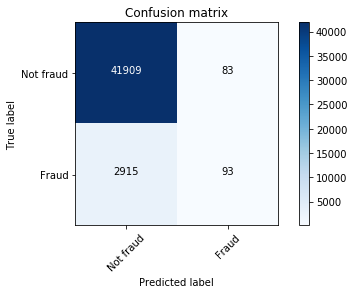


Decision tree results:
Mean accuracy: 0.8952444444444444
Mean precision: 0.24537313432835822
Mean recall: 0.2732712765957447
AUPRC: 0.11563120743798737
AUROC: 0.6065346666842317


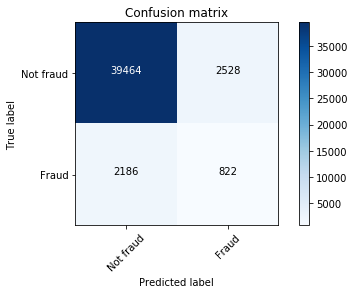


Naive Bayes results:
Mean accuracy: 0.9319333333333333
Mean precision: 0.35135135135135137
Mean recall: 0.02160904255319149
AUPRC: 0.07299236630247269
AUROC: 0.5093756776873406


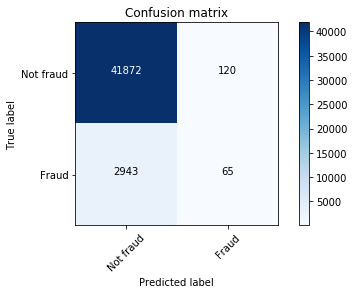


KNN results:
Mean accuracy: 0.9319333333333333
Mean precision: 0.3312883435582822
Mean recall: 0.01795212765957447
AUPRC: 0.0715917750801317
AUROC: 0.5076781975695472


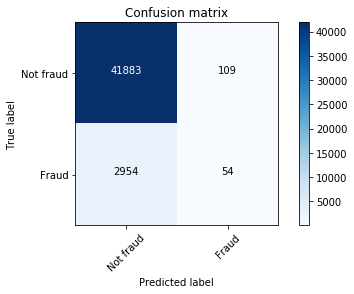

In [6]:
print("Logistic regression results:")
c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
#c_scores['logistic_regression'] = futils.stratified_crossvalidation(LogisticRegression, X=X_, y=y_, cv=3, scoring=scoring)
print("\nDecision tree results:")
c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
#c_scores['decision_tree'] = futils.stratified_crossvalidation(DecisionTreeClassifier, X=X_, y=y_, cv=3, scoring=scoring)
print("\nNaive Bayes results:")
c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
#c_scores['naive_bayes'] = futils.stratified_crossvalidation(GaussianNB, X=X_, y=y_, cv=3, scoring=scoring)
print("\nKNN results:")
c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)
#c_scores['knn'] = futils.stratified_crossvalidation(KNeighborsClassifier, X=X_, y=y_, cv=3, scoring=scoring)

## Scores

In [7]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
AUPRC,0.081115,0.115631,0.072992,0.071592
AUROC,0.514470,0.606535,0.509376,0.507678
accuracy,0.933378,0.895244,0.931933,0.931933
precision,0.528409,0.245373,0.351351,0.331288
recall,0.030918,0.273271,0.021609,0.017952
